In [3]:
import h5py
import sys
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from scipy.interpolate import make_smoothing_spline, make_splrep, interp1d, BSpline

In [4]:
import importlib
import tools
importlib.reload(tools)
from tools import bin_data  



data = np.load('/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon1k_0-1gev_estimators_edep_cleaned.npz')

energies = data['energies']
naive =data['naive']
detailed = data['detailed']
edep = data['edep']



In [5]:
splines = np.load('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns54k_truth.npz')

naive_spl = BSpline(splines['naive_t'], splines['naive_c'], splines['naive_k'])
detailed_spl = BSpline(splines['detailed_t'], splines['detailed_c'], splines['detailed_k'])
edep_spl = BSpline(splines['edep_t'], splines['edep_c'], splines['edep_k'])


total_evs='54k'


def signed_log(val):
    return np.sign(val) * np.log1p(np.abs(val))  # log1p(val) = log(1 + val)


In [6]:
naive_res = naive_spl(naive) - energies
naive_rres = naive_res / energies

detailed_res = detailed_spl(detailed) - energies
detailed_rres = detailed_res / energies

edep_res = edep_spl(edep) - energies
edep_rres = edep_res / energies

nstatbins = 40

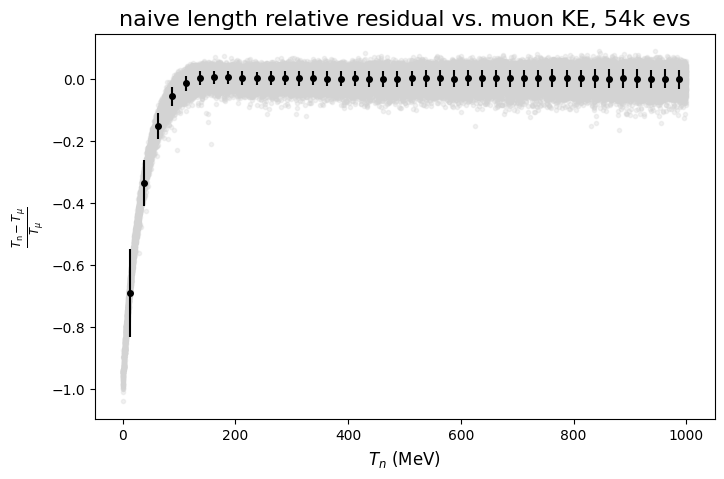

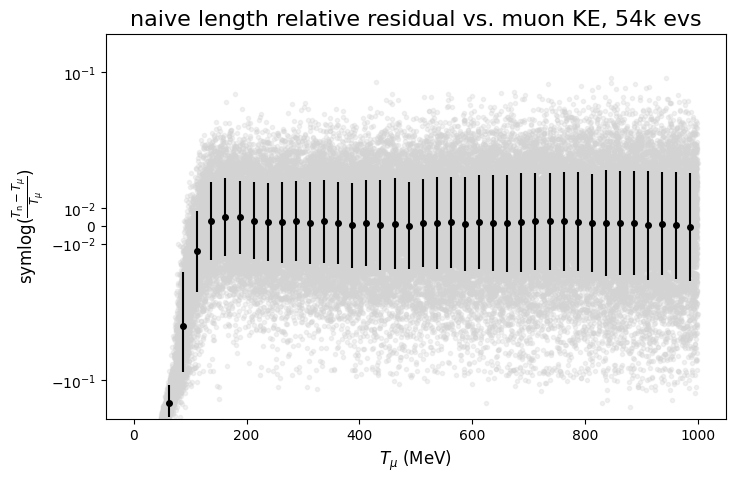

In [57]:
naive_rres_x, naive_rres_y, naive_rres_error, naive_rres_error2, _ = bin_data(energies, naive_rres, nstatbins)

# plot of all data and binned data with no log scale
plt.figure(figsize=(8, 5))
# plt.ylim(-0.15, 0.1)
plt.plot(energies, naive_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(naive_rres_x, naive_rres_y, naive_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_{n}$ (MeV)', fontsize=12)
plt.ylabel(r'$\frac{T_\text{n} - T_\mu}{T_\mu}$', fontsize=12)
plt.title(f'naive length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy_no_DIF/naive_rres_{total_evs}evs.png')


fig, ax = plt.subplots(figsize=(8, 5))
ax.set_yscale('symlog', linthresh=0.08)
plt.ylim(-0.2, 0.2)
ax.plot(energies, naive_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(naive_rres_x, naive_rres_y, naive_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'symlog($\frac{T_\text{n} - T_\mu}{T_\mu}$)', fontsize=12)
plt.title(f'naive length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy_no_DIF/naive_rres_log_{total_evs}evs.png')

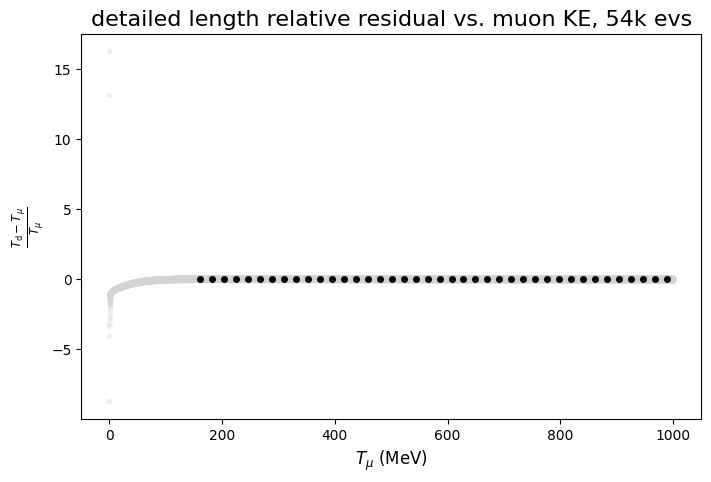

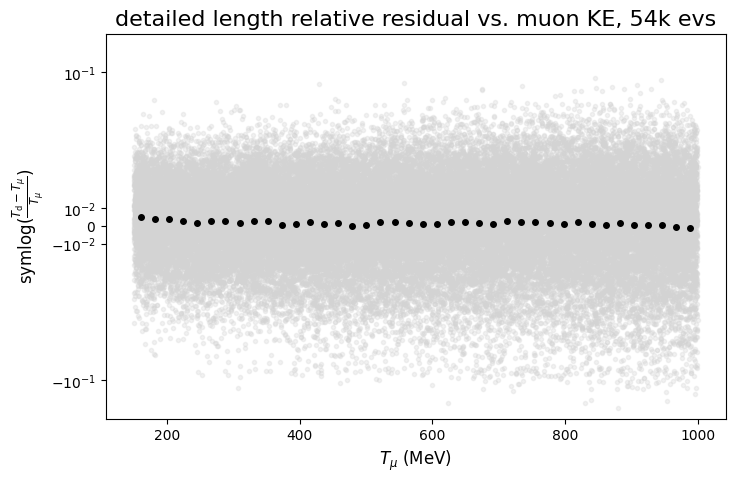

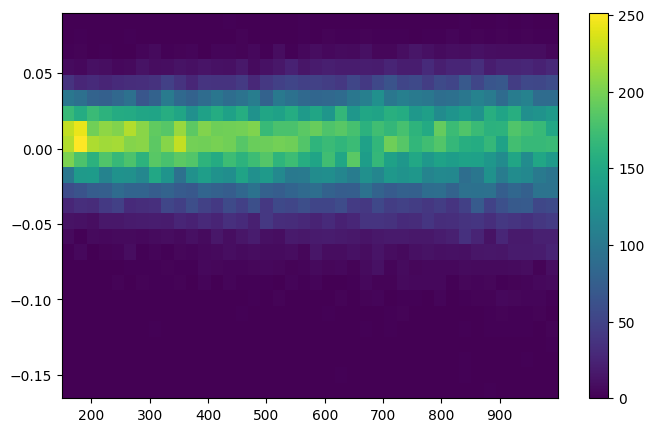

In [30]:
mask = energies > 150
energies2 = energies[mask]
detailed_rres2 = detailed_rres[mask]

detailed_rres_x, detailed_rres_y, detailed_rres_error, detailed_rres_error2, _ = bin_data(energies2, detailed_rres2, nstatbins)

# plot of all data and binned data with no log scale
plt.figure(figsize=(8, 5))
plt.plot(energies, detailed_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(detailed_rres_x, detailed_rres_y, detailed_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'$\frac{T_\text{d} - T_\mu}{T_\mu}$', fontsize=12)
plt.title(f'detailed length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
# plt.savefig(f'Plots/accuracy_no_DIF/detailed_rres_{total_evs}evs.png')


# plot of all data and binned data on log scale 
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_yscale('symlog', linthresh=0.08)
plt.ylim(-0.2, 0.2)
plt.plot(energies2, detailed_rres2, 'o', ms=3, color='lightgray', alpha=0.3)
plt.plot(detailed_rres_x, detailed_rres_y, 'o', color='black', ms=4)
# plt.errorbar(detailed_rres_x, detailed_rres_y, detailed_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'symlog($\frac{T_\text{d} - T_\mu}{T_\mu}$)', fontsize=12)
plt.title(f'detailed length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
# plt.savefig(f'Plots/accuracy_no_DIF/detailed_rres_log_{total_evs}evs.png')

fig, ax = plt.subplots(figsize=(8, 5))
# ax.set_yscale('symlog', linthresh=0.02)
plt.hist2d(energies2, detailed_rres2, bins=(40, 25))
plt.colorbar()

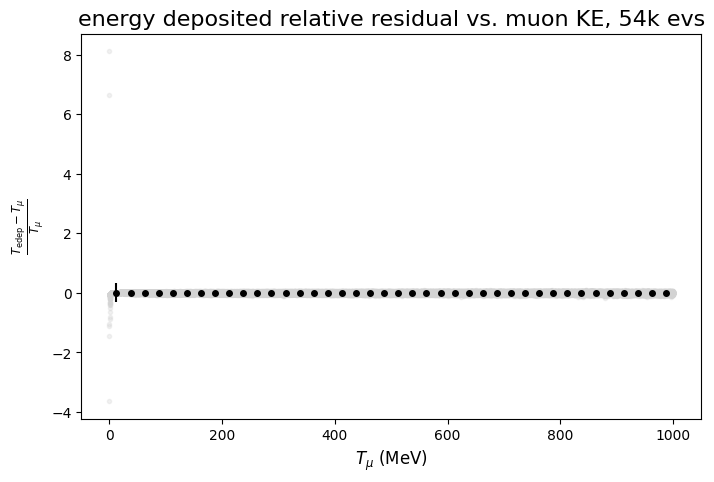

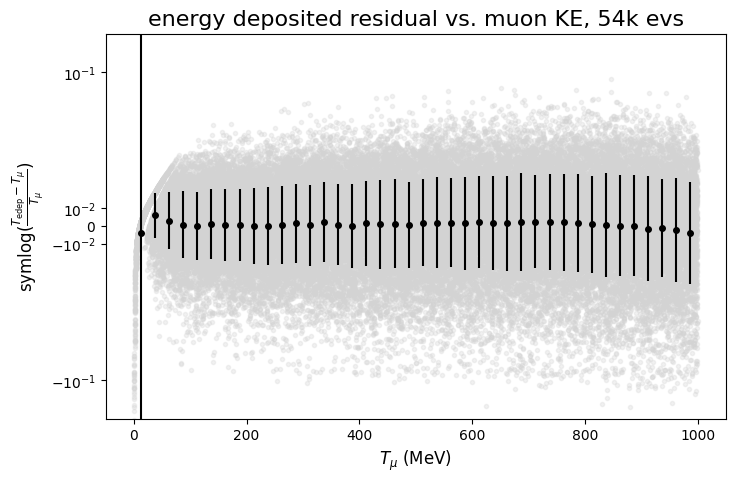

In [63]:
edep_rres_x, edep_rres_y, edep_rres_error, edep_rres_error2, _ = bin_data(energies, edep_rres, nstatbins)

# plot of all data and binned data with no log scale
plt.figure(figsize=(8, 5))
plt.plot(energies, edep_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(edep_rres_x, edep_rres_y, edep_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'$\frac{T_\text{edep} - T_\mu}{T_\mu}$', fontsize=12)
plt.title(f'energy deposited relative residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy_no_DIF/edep_rres_{total_evs}evs.png')


# plot of all data and binned data on log scale 
fig, ax = plt.subplots(figsize=(8, 5))
plt.ylim(-0.2, 0.2)
ax.set_yscale('symlog', linthresh=0.08)
plt.plot(energies, edep_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(edep_rres_x, edep_rres_y, edep_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'symlog($\frac{T_\text{edep} - T_\mu}{T_\mu}$)', fontsize=12)
plt.title(f'energy deposited residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy_no_DIF/edep_rres_log_{total_evs}evs.png')

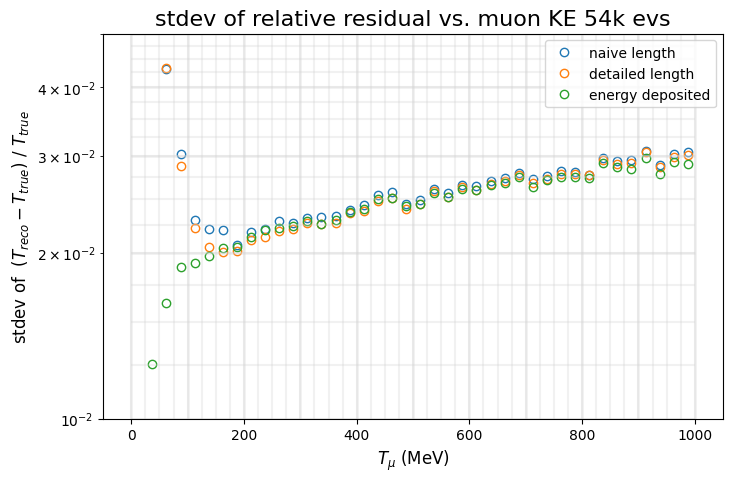

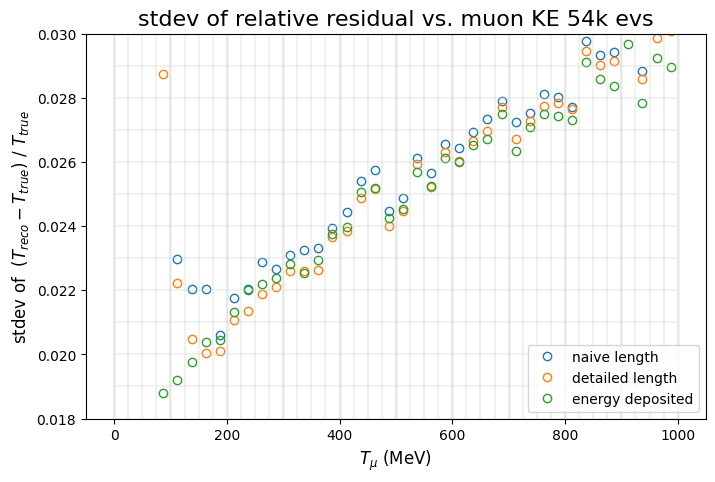

In [54]:
# comparisons ---------------
vlines_main = np.linspace(min(energies), max(energies), 11)
vlines_fine = np.linspace(min(energies), max(energies), 41)
hlines_main = np.linspace(0.01, 0.05, 5)
hlines_fine = np.linspace(0.01, 0.05, 17)

# plt.figure(figsize=(8, 5))
# plt.plot(naive_rres_x, naive_rres_error, 'o', label="naive length", markerfacecolor='none')
# plt.plot(detailed_rres_x, detailed_rres_error, 'o', label='detailed length', markerfacecolor='none')
# plt.plot(edep_rres_x, edep_rres_error, 'o', label='energy deposited', markerfacecolor='none')
# plt.vlines(x=vlines, ymin=0, ymax=1.5, color='lightgray', alpha=0.3)
# plt.legend()
# plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
# plt.ylabel('rms of relative residual', fontsize=12)
# plt.title(f'rms of relative residual vs. muon KE_{total_evs} evs', fontsize=16)
# # plt.savefig(f'Plots/accuracy_no_DIF/rres_rms_comparison_{total_evs}evs.png')

# plt.figure(figsize=(8, 5))
# plt.yscale('log')
# plt.plot(naive_rres_x, naive_rres_error, 'o', label="naive length", markerfacecolor='none')
# plt.plot(detailed_rres_x, detailed_rres_error, 'o', label='detailed length', markerfacecolor='none')
# plt.plot(edep_rres_x, edep_rres_error, 'o', label='energy deposited', markerfacecolor='none')
# plt.vlines(x=vlines, ymin=0, ymax=1.5, color='lightgray', alpha=0.3)
# plt.legend()
# plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
# plt.ylabel('rms of relative residual', fontsize=12)
# plt.title(f'rms of relative residual vs. muon KE {total_evs} evs', fontsize=16)
# plt.savefig(f'Plots/accuracy_no_DIF/rres_rms_comparison_log_{total_evs}evs.png')


plt.figure(figsize=(8, 5))
plt.ylim(0.01, 0.05)
plt.yscale('log')
plt.plot(naive_rres_x, naive_rres_error, 'o', label="naive length", markerfacecolor='none')
plt.plot(detailed_rres_x, detailed_rres_error, 'o', label='detailed length', markerfacecolor='none')
plt.plot(edep_rres_x, edep_rres_error, 'o', label='energy deposited', markerfacecolor='none')
plt.vlines(x=vlines_main, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=2)
plt.vlines(x=vlines_fine, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=1.5)
plt.hlines(y=hlines_main, xmin=0, xmax=1000, color='lightgray', alpha=0.3, linewidth=2)
plt.hlines(y=hlines_fine, xmin=0, xmax=1000, color='lightgray', alpha=0.3, linewidth=1.5)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'stdev of $\ (T_{reco} - T_{true}) \ / \ T_{true}$', fontsize=12)
plt.title(f'stdev of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'Plots/accuracy_no_DIF/rres_stdev_comparison_logzoom.png')


hlines2 = np.linspace(0.018, 0.03, 13)
plt.figure(figsize=(8, 5))
plt.ylim(0.018, 0.03)
plt.plot(naive_rres_x, naive_rres_error, 'o', label="naive length", markerfacecolor='none')
plt.plot(detailed_rres_x, detailed_rres_error, 'o', label='detailed length', markerfacecolor='none')
plt.plot(edep_rres_x, edep_rres_error, 'o', label='energy deposited', markerfacecolor='none')
plt.vlines(x=vlines_main, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=2)
plt.vlines(x=vlines_fine, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=1.5)
plt.hlines(y=hlines2, xmin=0, xmax=1000, color='lightgray', alpha=0.3)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'stdev of $\ (T_{reco} - T_{true}) \ / \ T_{true}$', fontsize=12)
plt.title(f'stdev of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'Plots/accuracy_no_DIF/rres_stdev_comparison_linearzoom_{total_evs}evs.png')

### plots from when we were figuring out DIFs ###

In [58]:
bins = np.linspace(0, 1000, 41)

bin_labels = range(n_bins)
naive_data_sep = dict.fromkeys(bin_labels, 0)
detailed_data_sep = dict.fromkeys(bin_labels, 0)
edep_data_sep = dict.fromkeys(bin_labels, 0)

for i, bin_edge in enumerate(bins): 
    if i==0:
        continue
    else:
        mask = (energies >= bins[i-1]) & (energies < bins[i])
        naive_data_sep[i-1] = naive_rres[mask]
        detailed_data_sep[i-1] = detailed_rres[mask]
        edep_data_sep[i-1] = edep_rres[mask]
        

NameError: name 'n_bins' is not defined

/lscratch/seohyeon/tmp/ipykernel_3312164/2401770733.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 5))


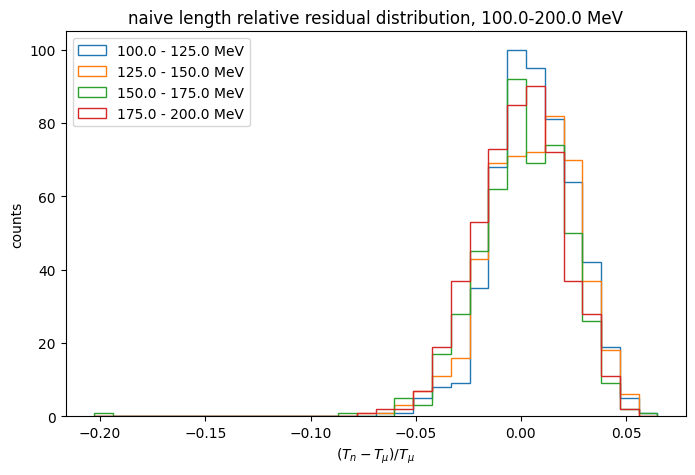

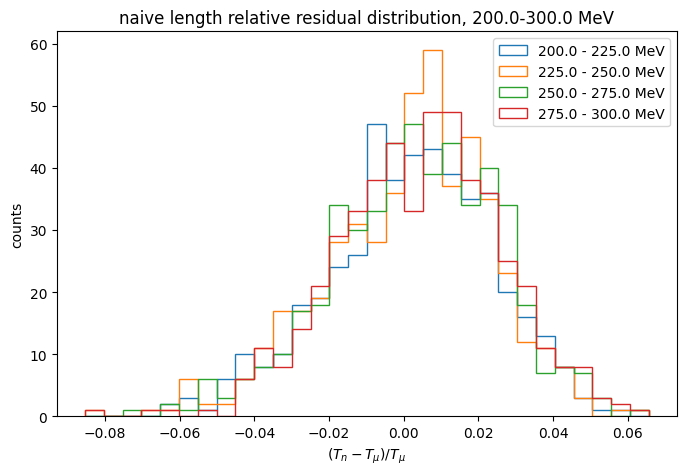

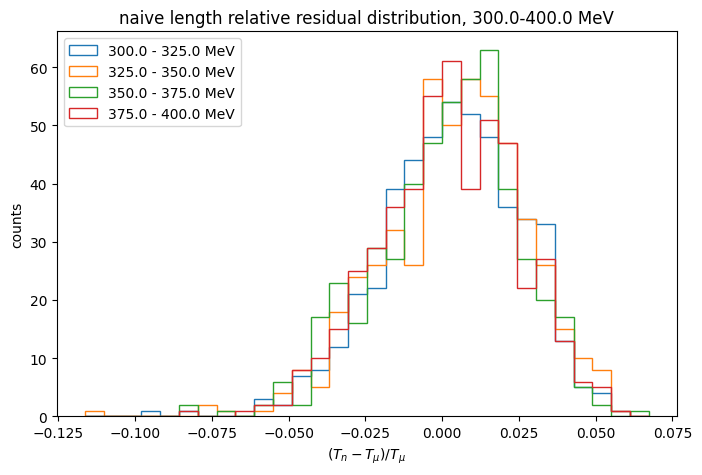

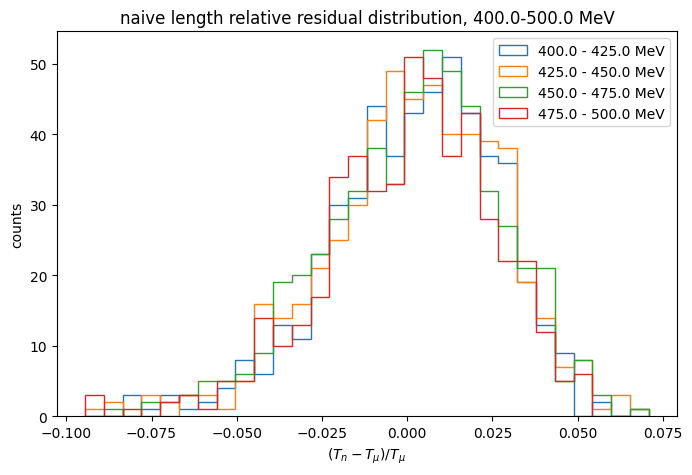

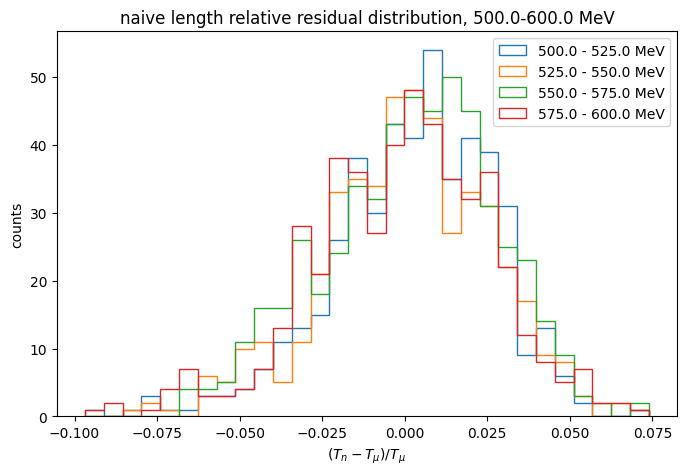

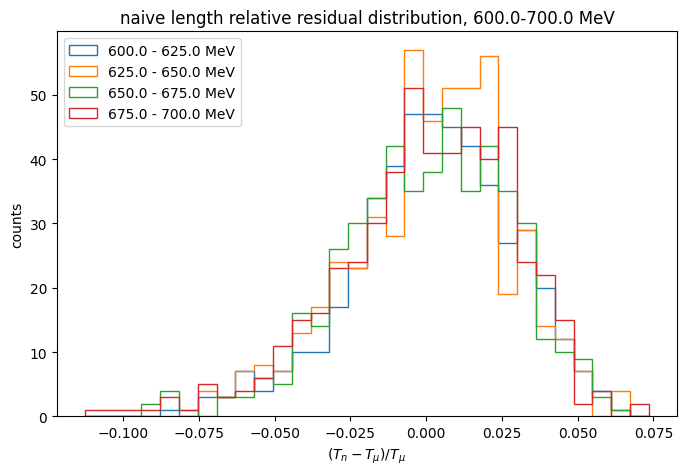

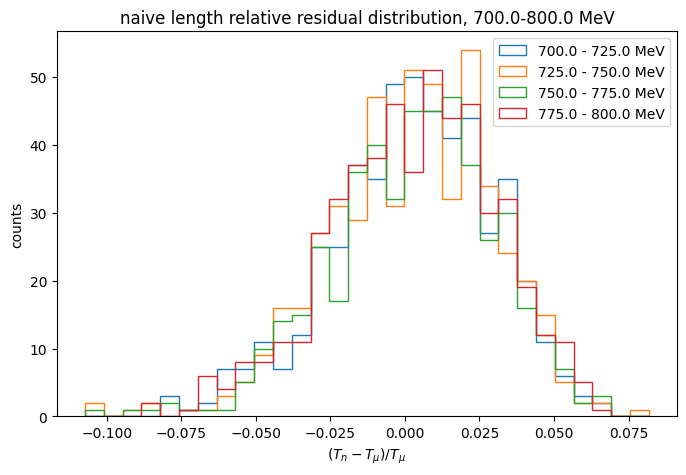

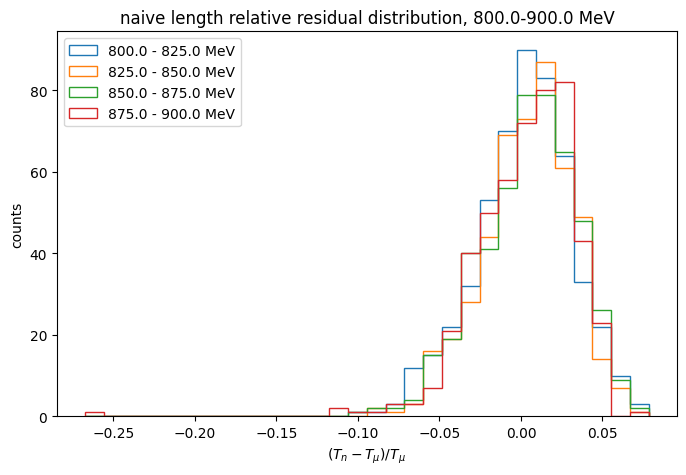

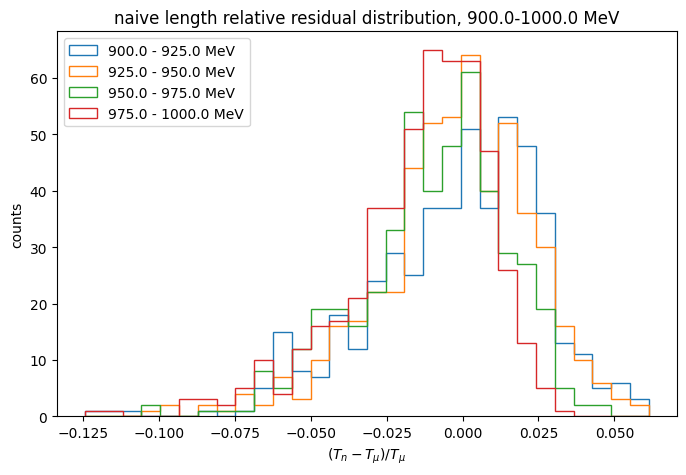

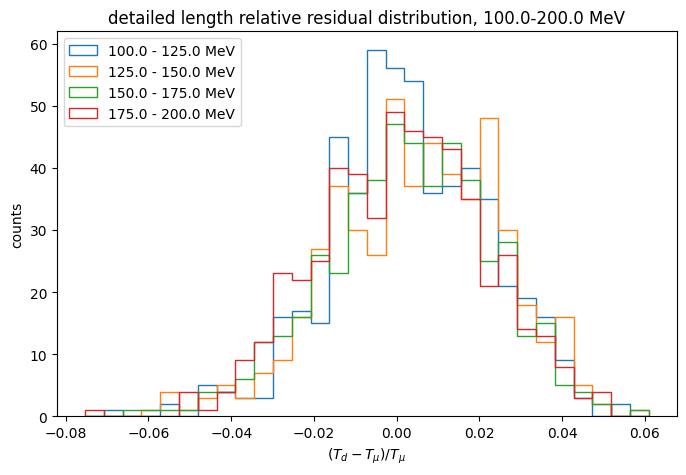

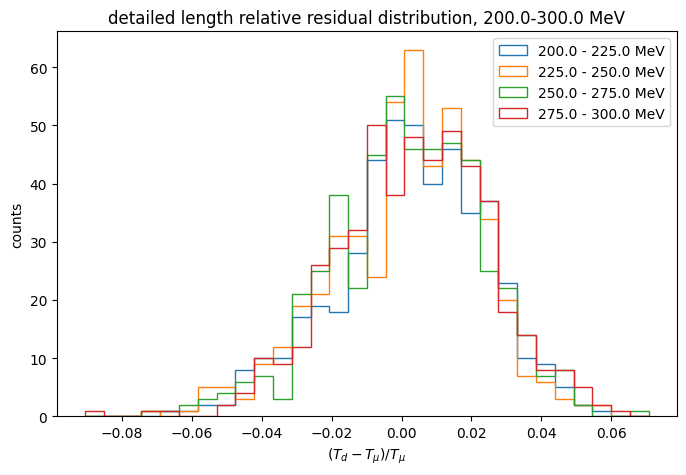

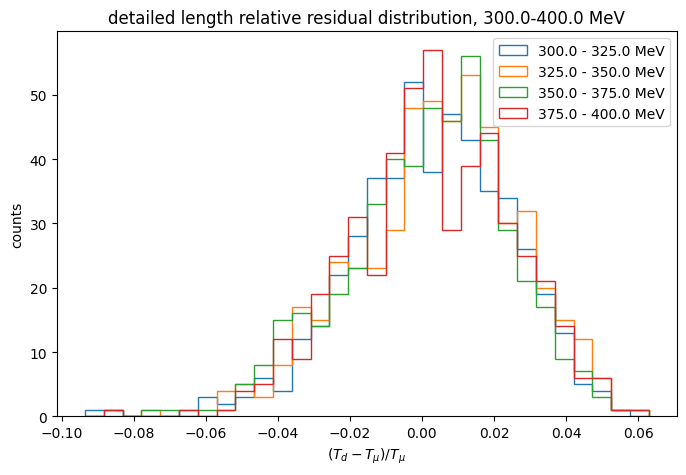

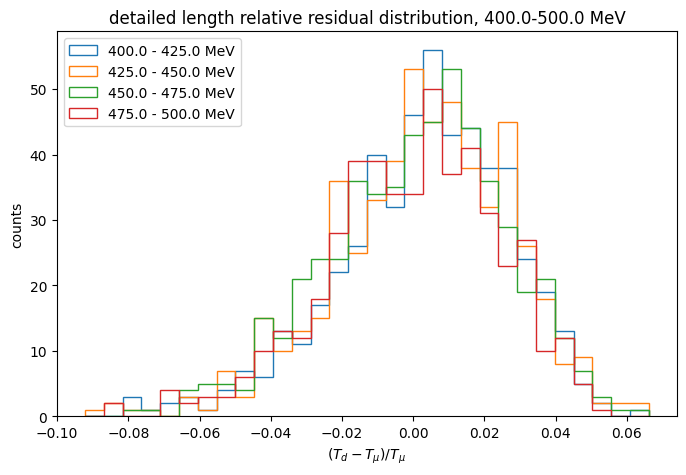

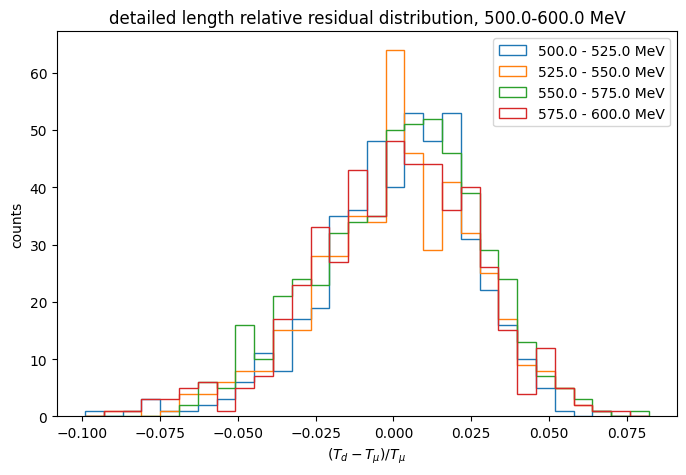

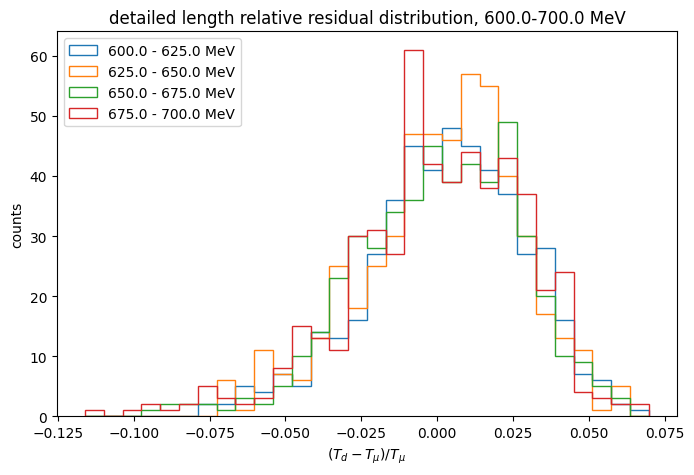

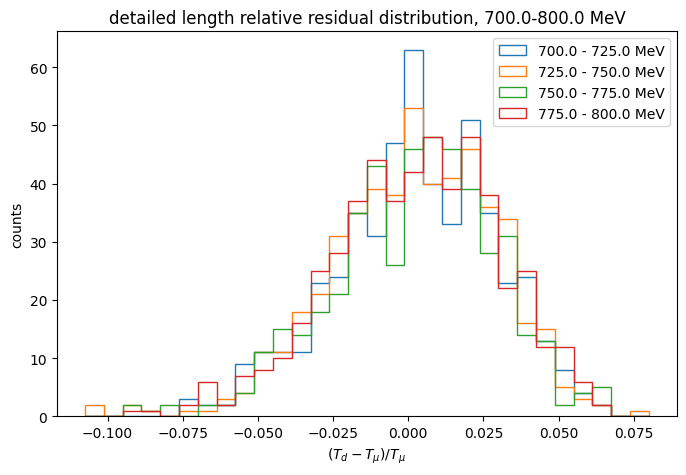

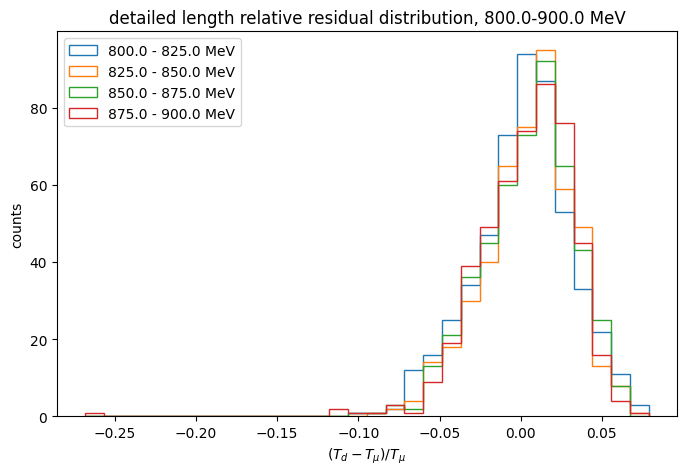

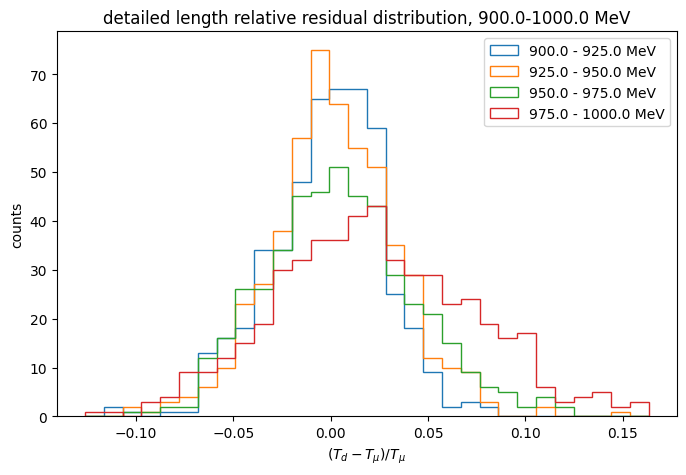

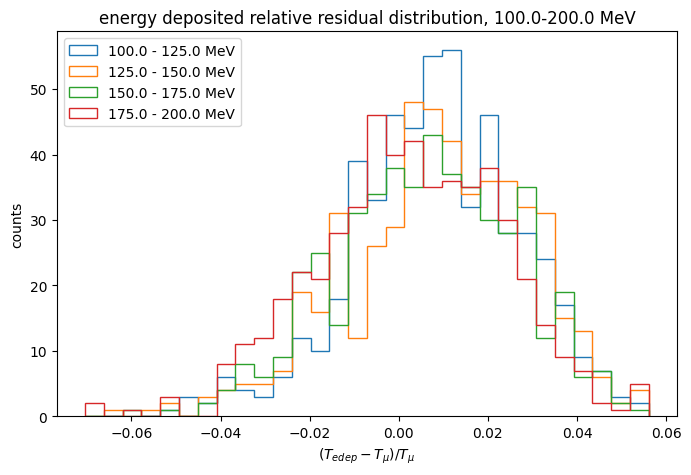

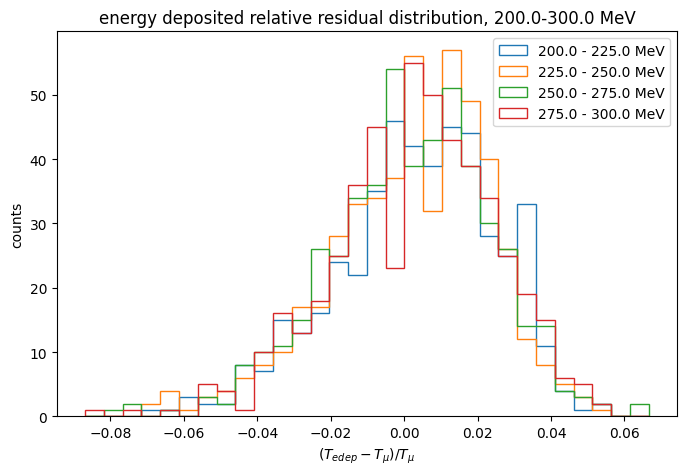

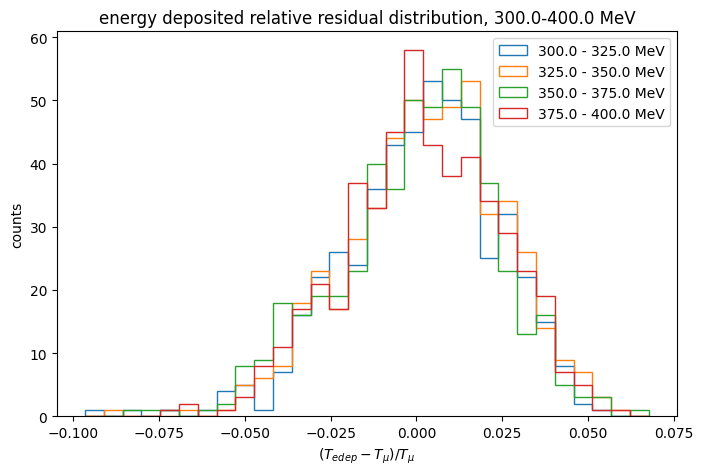

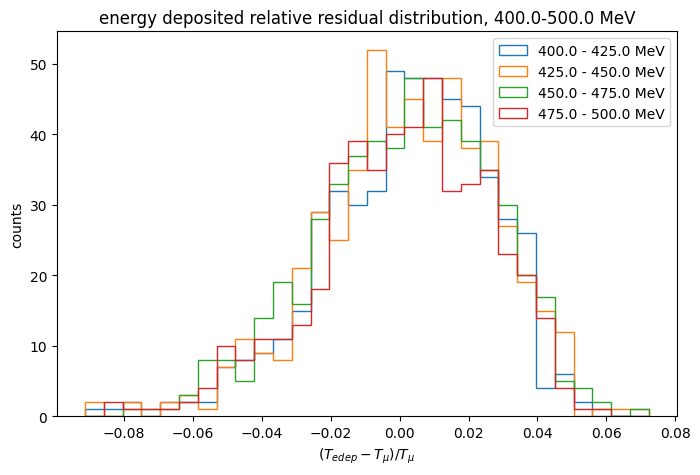

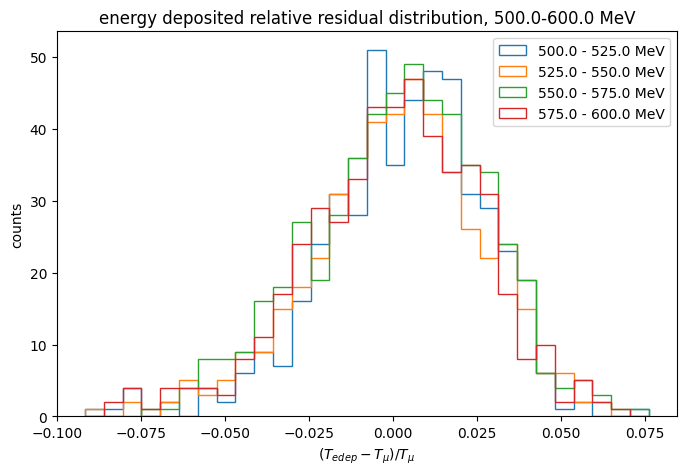

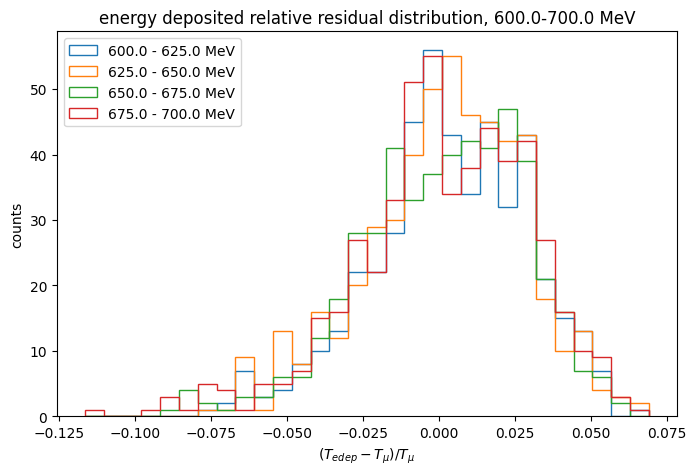

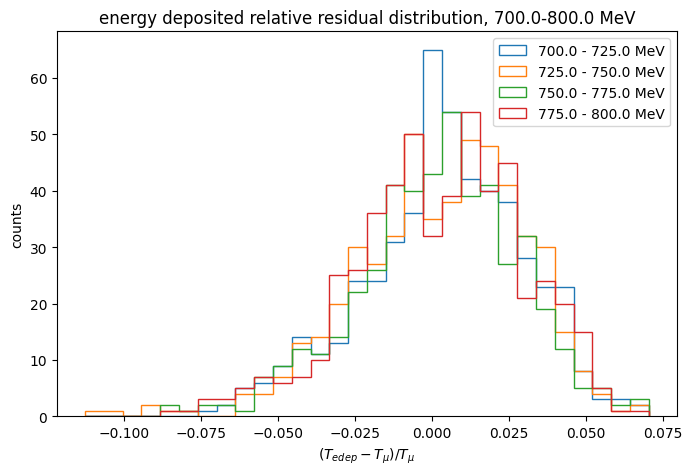

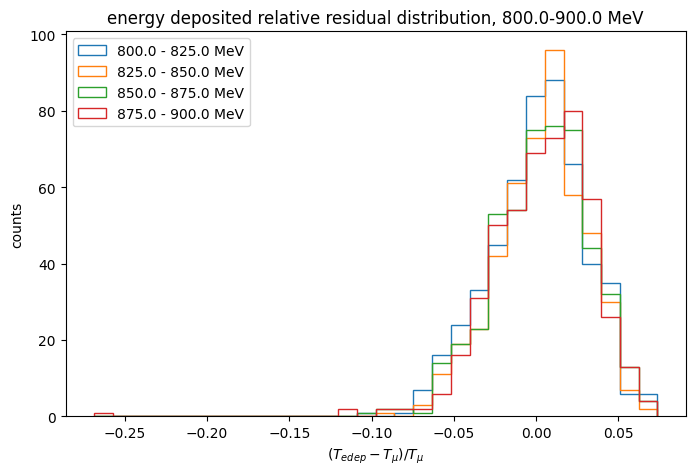

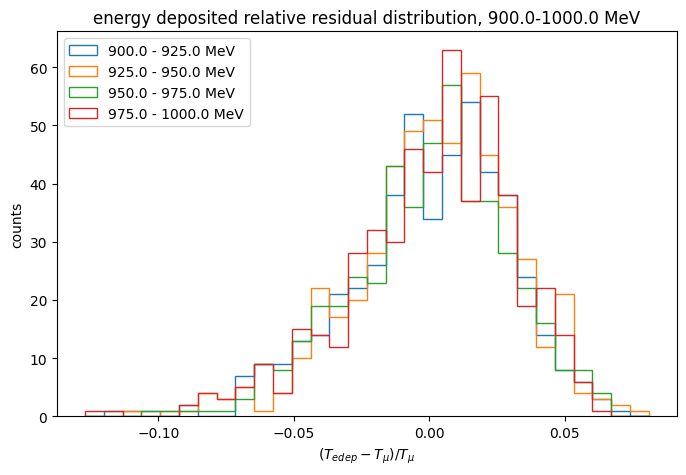

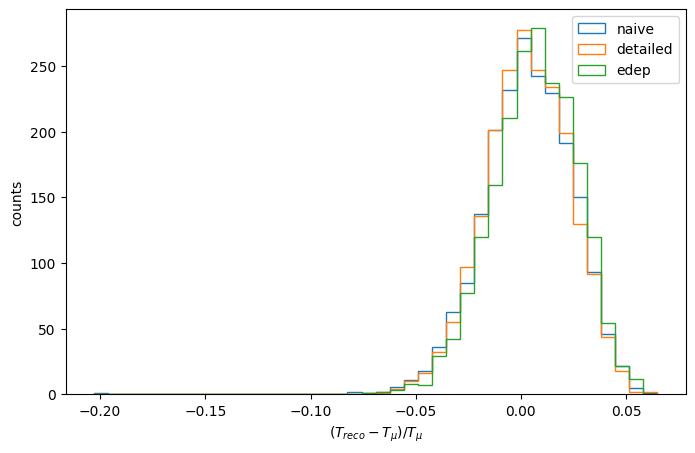

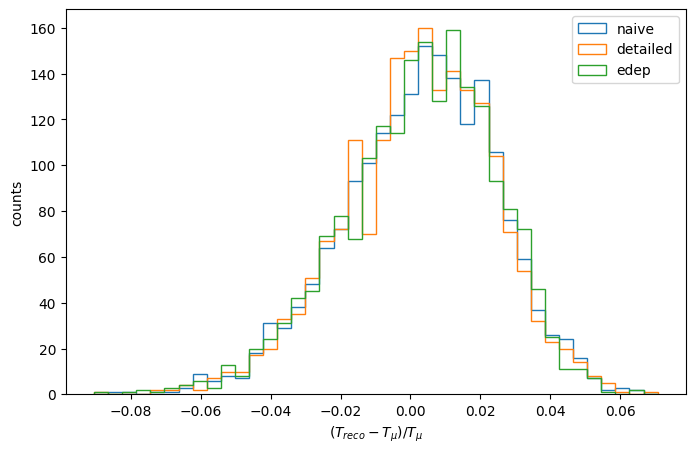

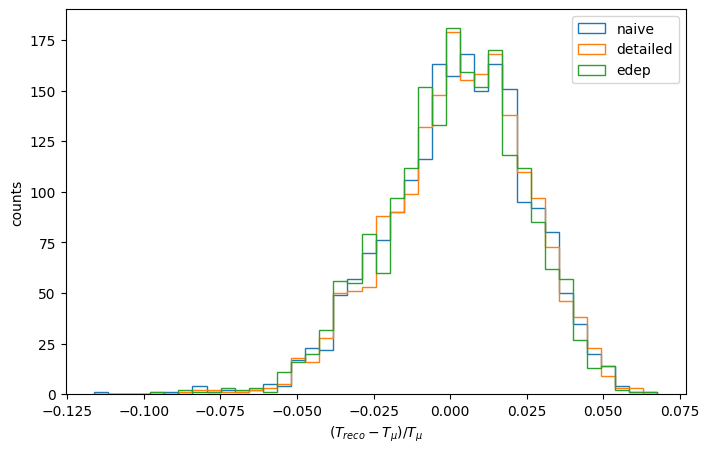

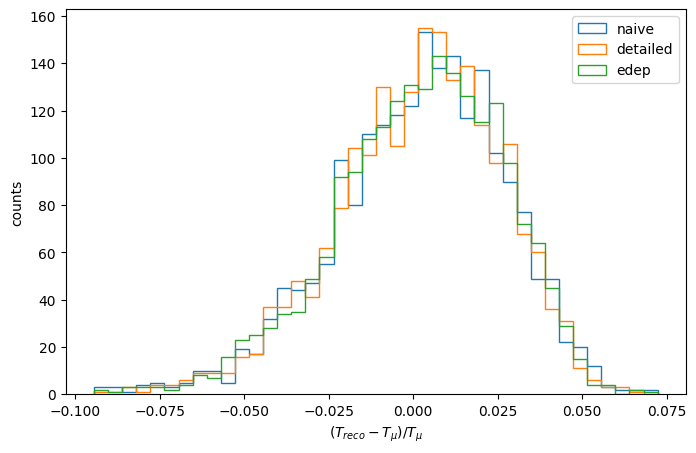

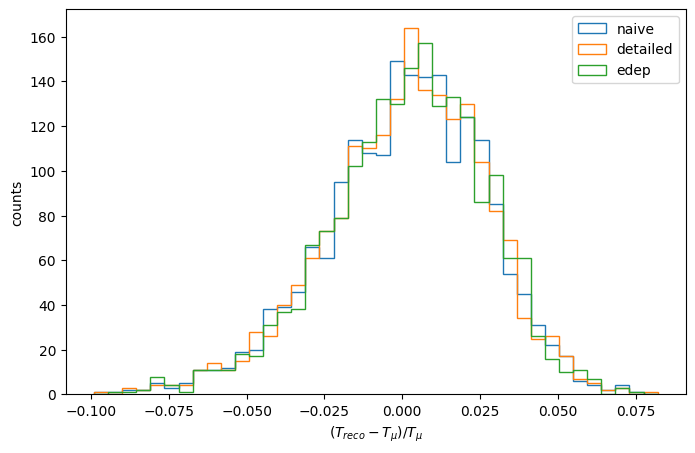

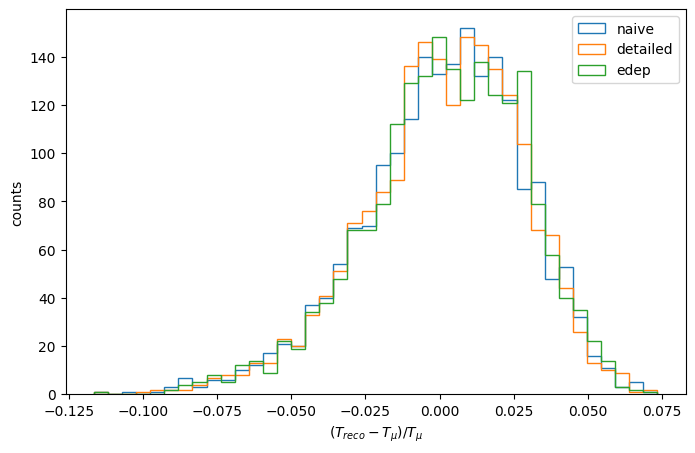

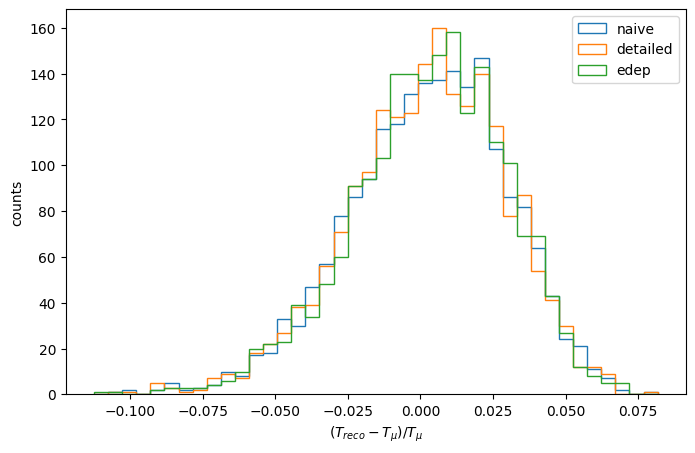

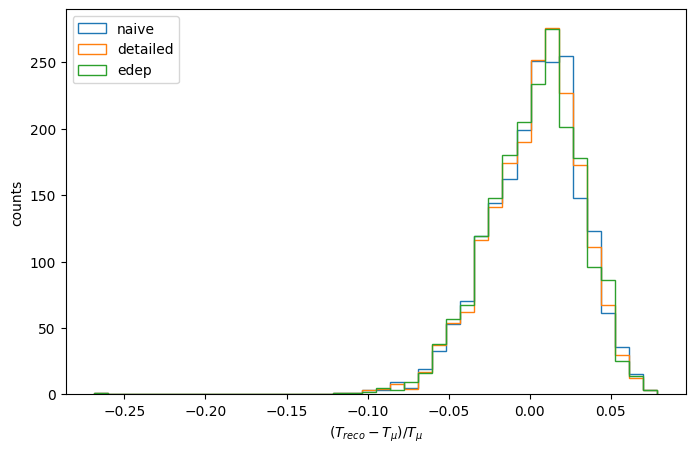

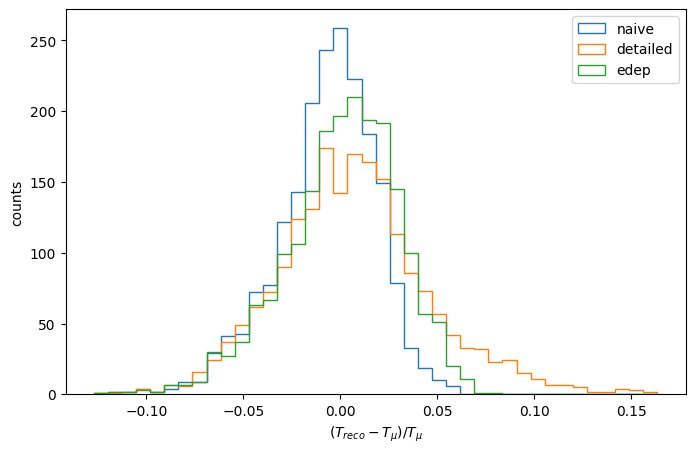

In [140]:
groups = [[4, 8], [8, 12], [12, 16], [16, 20], [20, 24], [24, 28], [28, 32], [32, 36], [36, 40]]


for group in groups:
    fig, ax = plt.subplots(figsize=(8, 5))

    all_data=[]
    for n in range(group[0], group[1]):
        all_data.extend(naive_data_sep[n])
    common_bins = np.linspace(min(all_data), max(all_data), 31)

    counter = 0
    for n in range(group[0], group[1]):
        bin_data = naive_data_sep[n]
    
        min_energy = round(bins[n], 1)
        max_energy = round(bins[n+1], 1)
    
        ax.hist(bin_data, bins=common_bins, label=f'{min_energy} - {max_energy} MeV', histtype='step')
        plt.title(f'naive length relative residual distribution, {bins[group[0]]}-{max_energy} MeV')
        plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
        plt.ylabel('counts')
        counter += 1
    
    plt.legend()
    plt.savefig(f'Plots/accuracy_no_DIF/naive/naive_{bins[group[0]]}-{max_energy}mev_overlay.png')

for group in groups:
    fig, ax = plt.subplots(figsize=(8, 5))

    all_data=[]
    for n in range(group[0], group[1]):
        all_data.extend(detailed_data_sep[n])
    common_bins = np.linspace(min(all_data), max(all_data), 31)

    for n in range(group[0], group[1]):
        bin_data = detailed_data_sep[n]
    
        min_energy = round(bins[n], 1)
        max_energy = round(bins[n+1], 1)
    
        ax.hist(bin_data, bins=common_bins, label=f'{min_energy} - {max_energy} MeV', histtype='step')
        plt.title(f'detailed length relative residual distribution, {bins[group[0]]}-{max_energy} MeV')
        plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
        plt.ylabel('counts')
    plt.legend()
    plt.savefig(f'Plots/accuracy_no_DIF/detailed/detailed_{bins[group[0]]}-{max_energy}mev_overlay.png')

for group in groups:
    fig, ax = plt.subplots(figsize=(8, 5))

    all_data=[]
    for n in range(group[0], group[1]):
        all_data.extend(edep_data_sep[n])
    common_bins = np.linspace(min(all_data), max(all_data), 31)

    for n in range(group[0], group[1]):
        bin_data = edep_data_sep[n]
    
        min_energy = round(bins[n], 1)
        max_energy = round(bins[n+1], 1)
    
        ax.hist(bin_data, bins=common_bins, label=f'{min_energy} - {max_energy} MeV', histtype='step')
        plt.title(f'energy deposited relative residual distribution, {bins[group[0]]}-{max_energy} MeV')
        plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
        plt.ylabel('counts')
    plt.legend()
    plt.savefig(f'Plots/accuracy_no_DIF/edep/edep_{bins[group[0]]}-{max_energy}mev_overlay.png')


for group in groups:
    fig, ax = plt.subplots(figsize=(8, 5))
    naive_bin_data = []
    detailed_bin_data = []
    edep_bin_data = []

    all_data=[]

    for n in range(group[0], group[1]):
        naive_bin_data.extend(naive_data_sep[n])
        detailed_bin_data.extend(detailed_data_sep[n])
        edep_bin_data.extend(edep_data_sep[n])

    all_data.extend(naive_bin_data)
    all_data.extend(detailed_bin_data)
    all_data.extend(edep_bin_data)

    common_bins = np.linspace(min(all_data), max(all_data), 41)

    ax.hist(naive_bin_data, bins=common_bins, label='naive', histtype='step')
    ax.hist(detailed_bin_data, bins=common_bins, label='detailed', histtype='step')
    ax.hist(edep_bin_data, bins=common_bins, label='edep', histtype='step')
    plt.xlabel(r'$(T_{reco} - T_\mu) / T_\mu$')
    plt.ylabel('counts')
    plt.legend()
    plt.savefig(f'Plots/accuracy_no_DIF/comparisons/{bins[group[0]]}-{bins[group[1]]}.png')


/lscratch/seohyeon/tmp/ipykernel_3312164/3802158015.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 5))


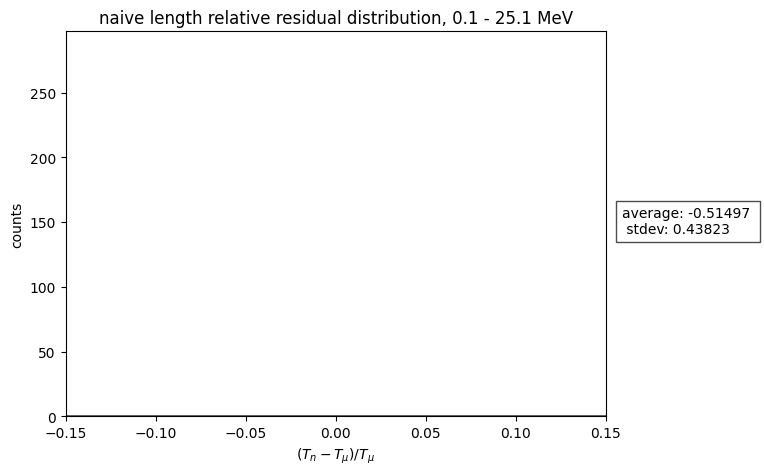

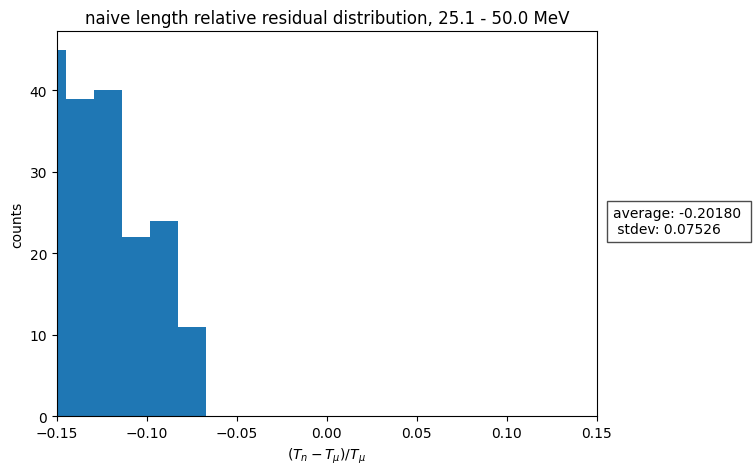

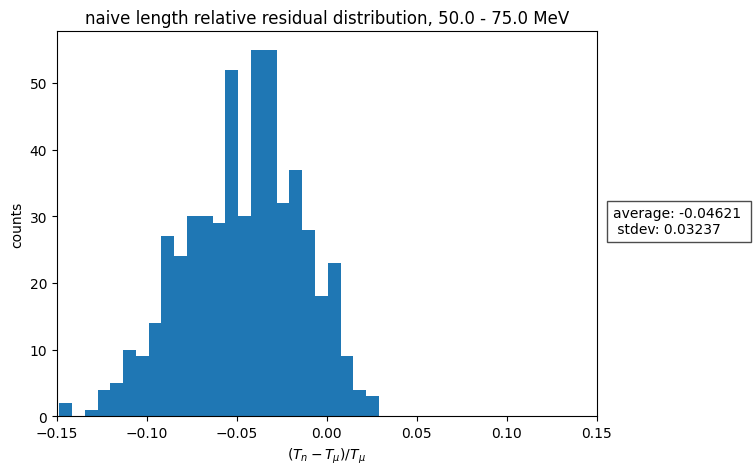

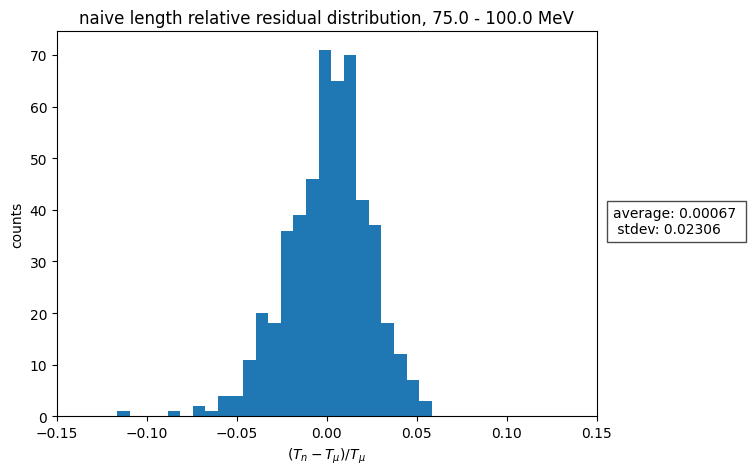

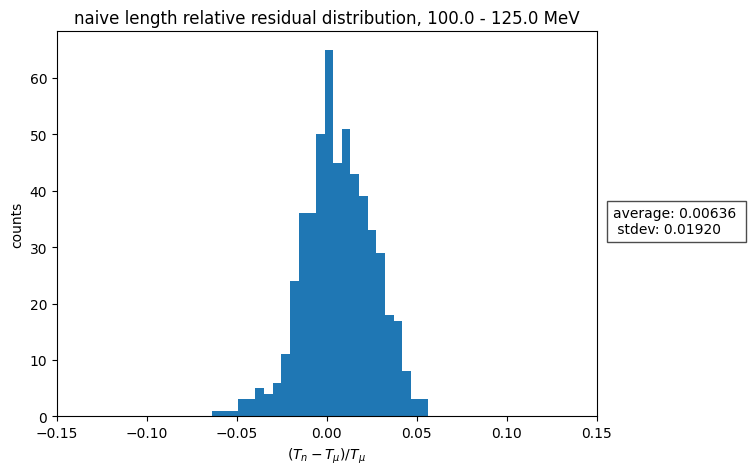

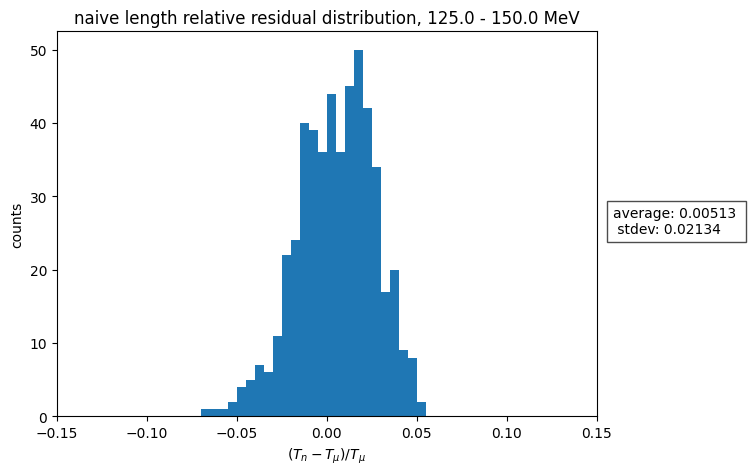

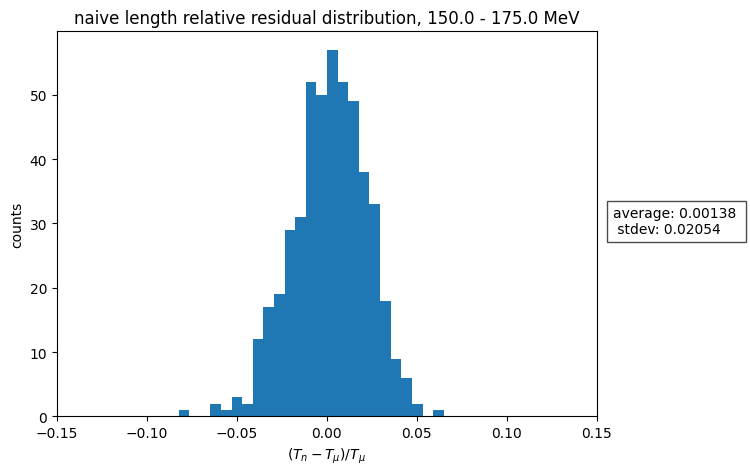

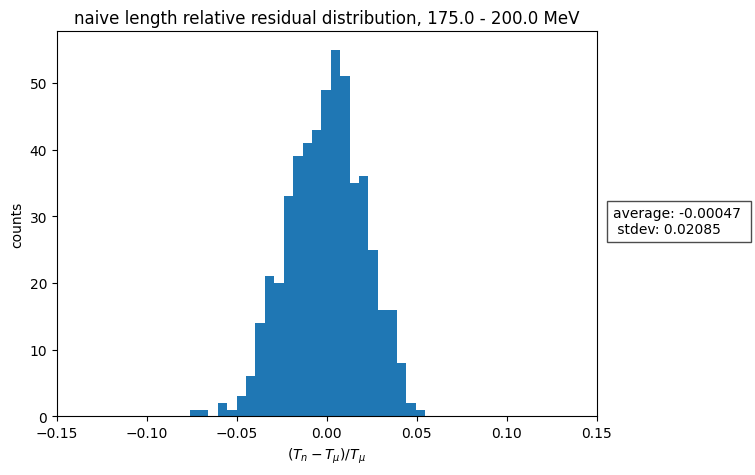

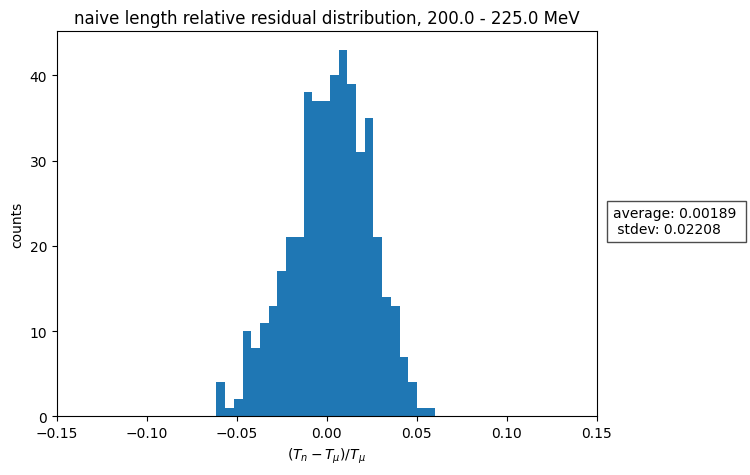

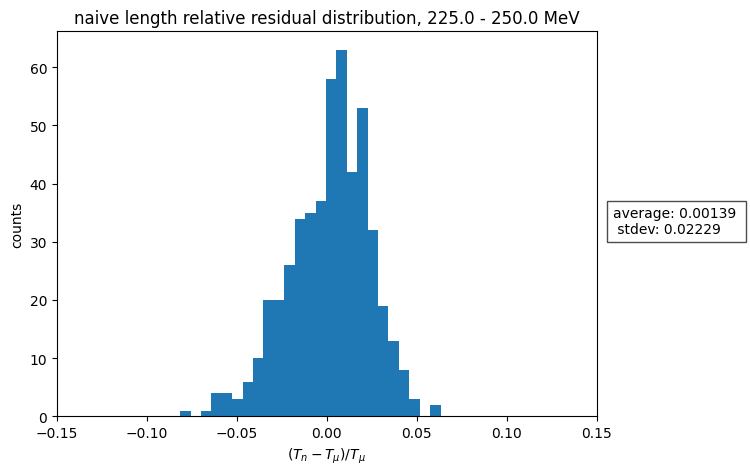

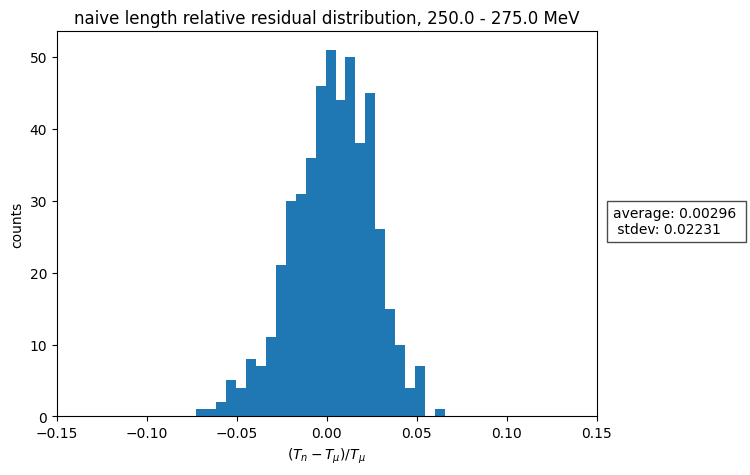

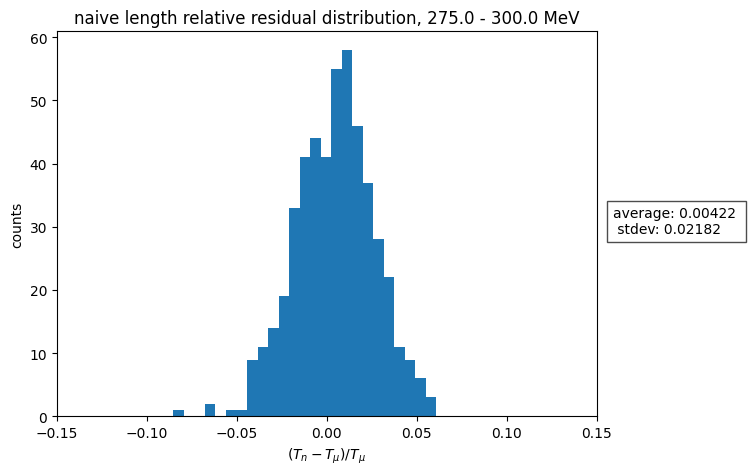

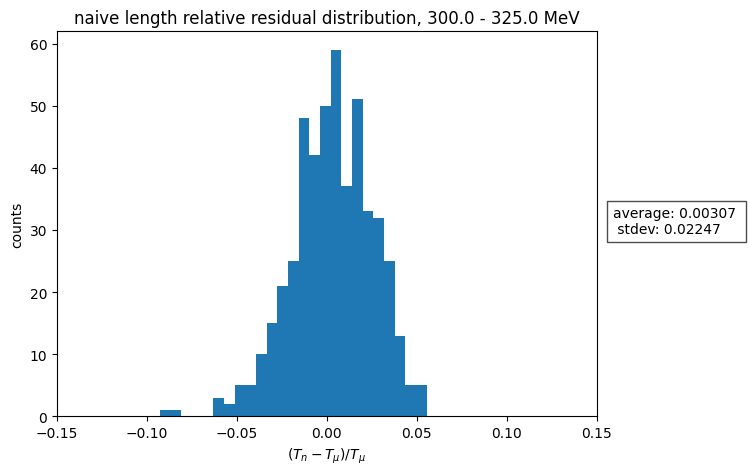

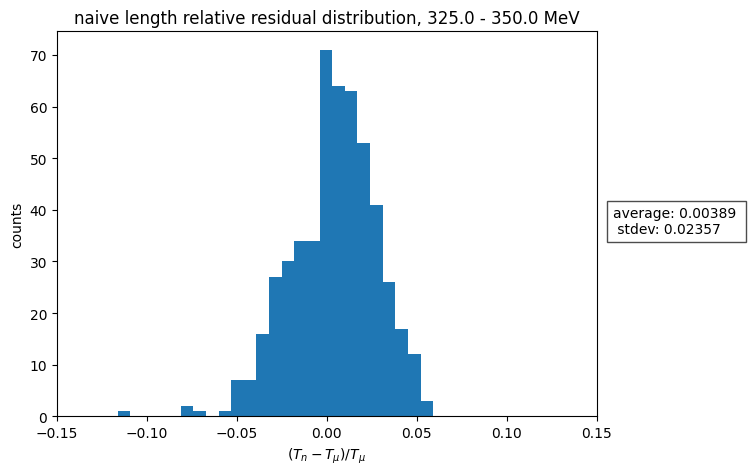

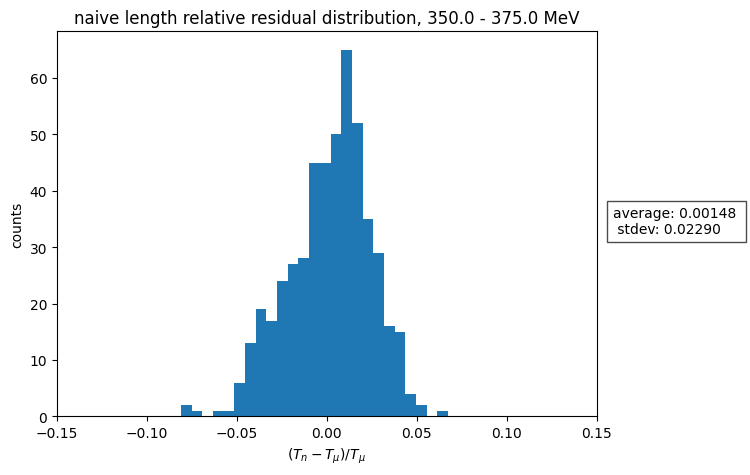

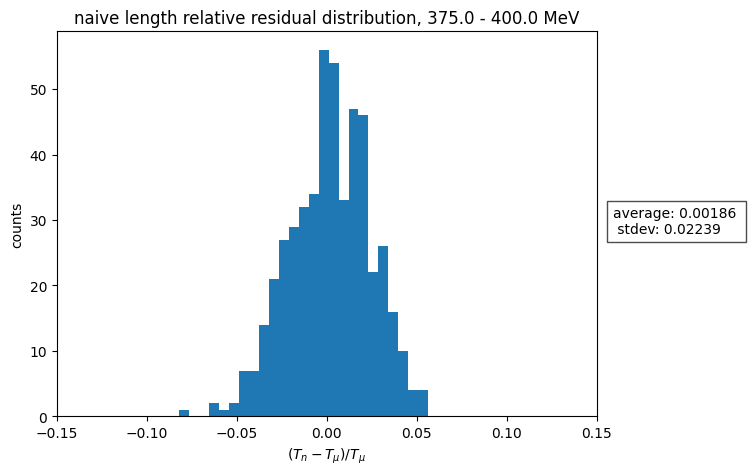

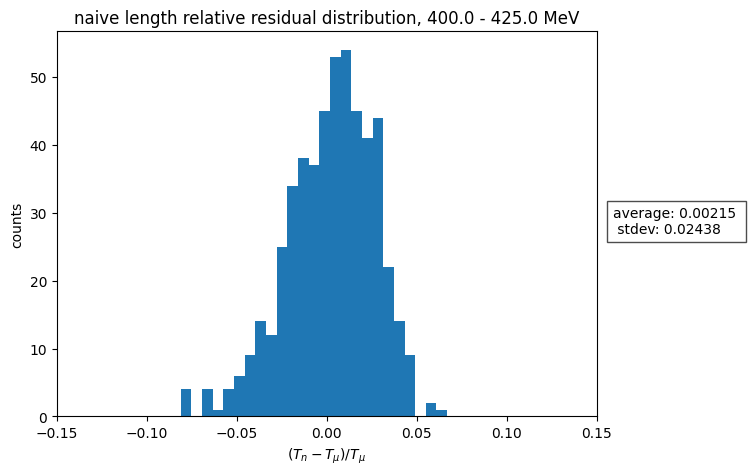

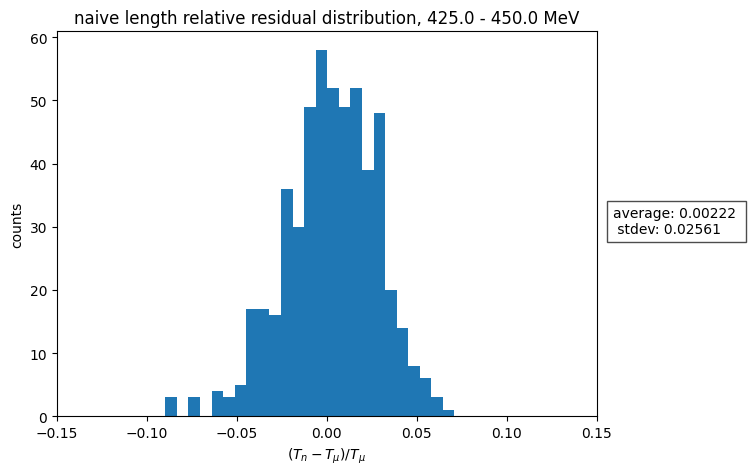

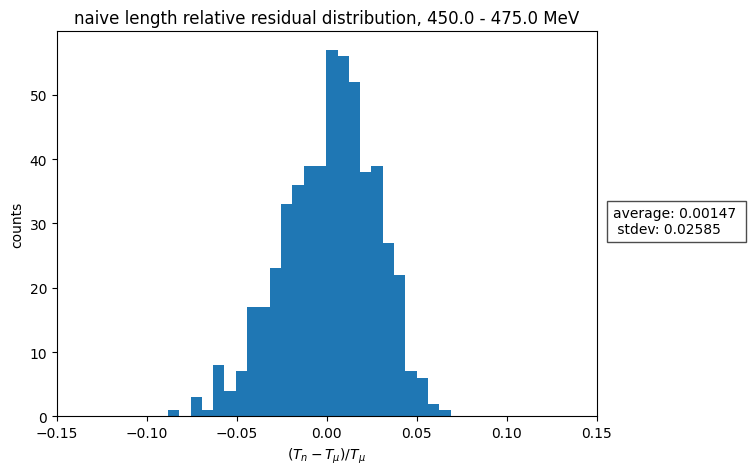

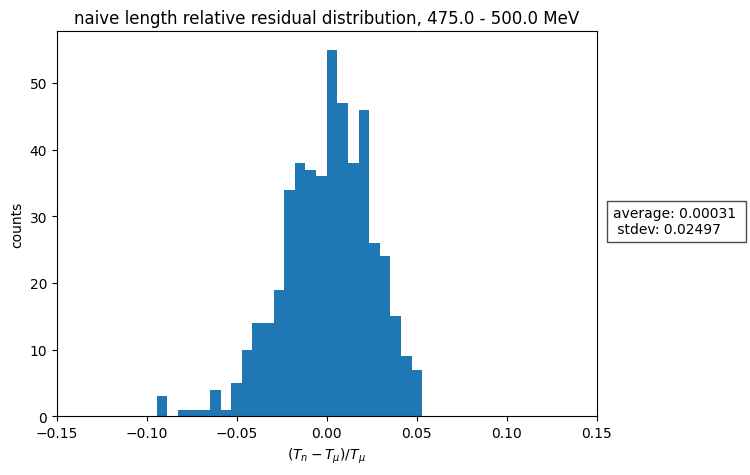

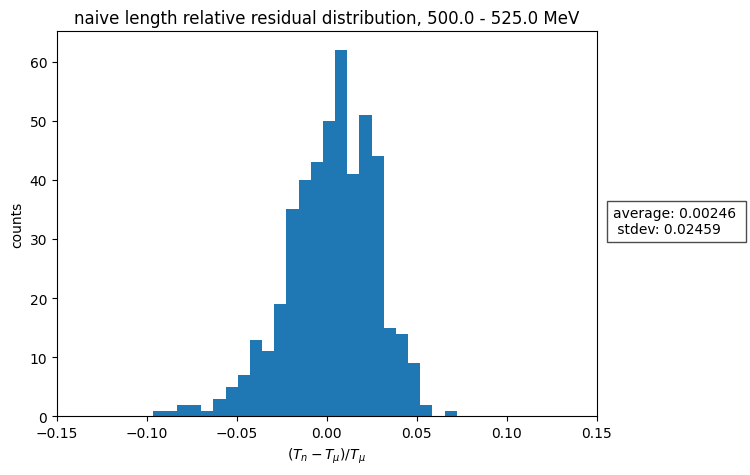

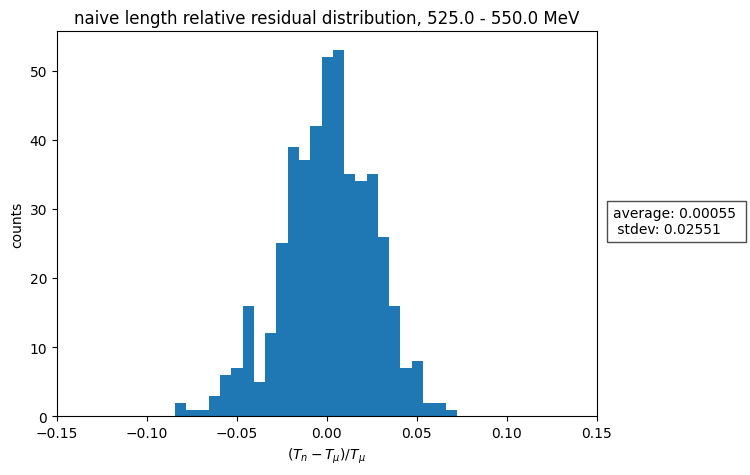

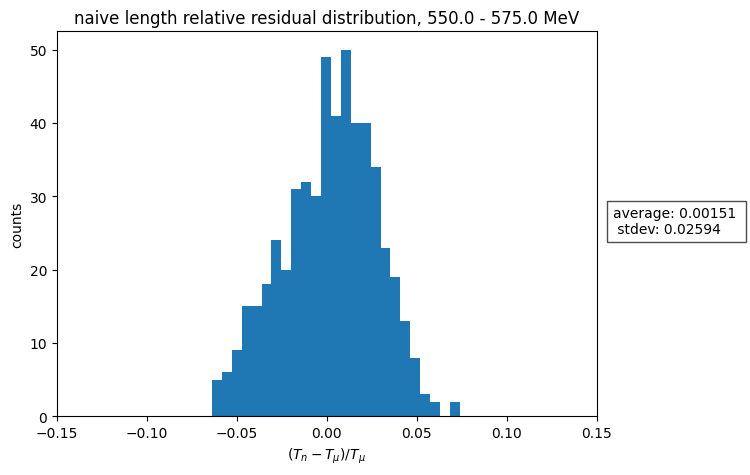

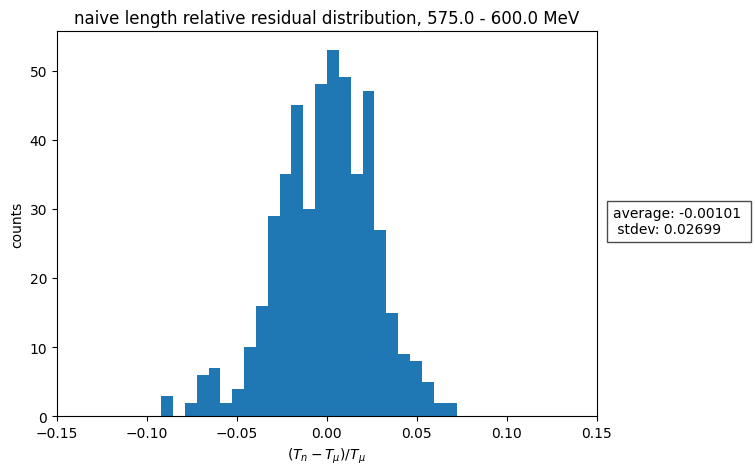

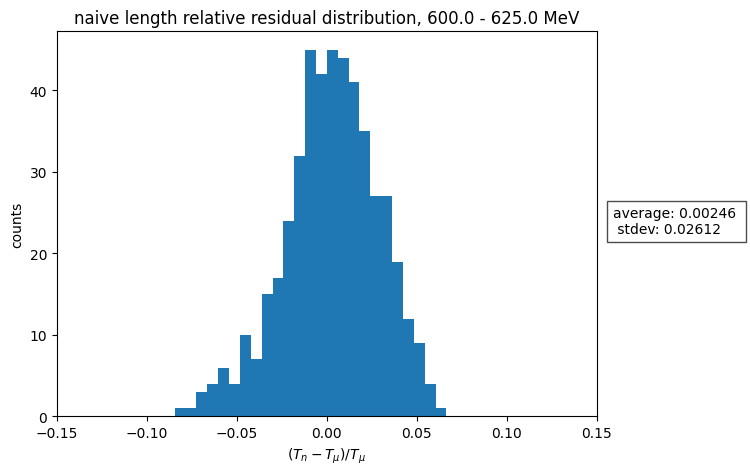

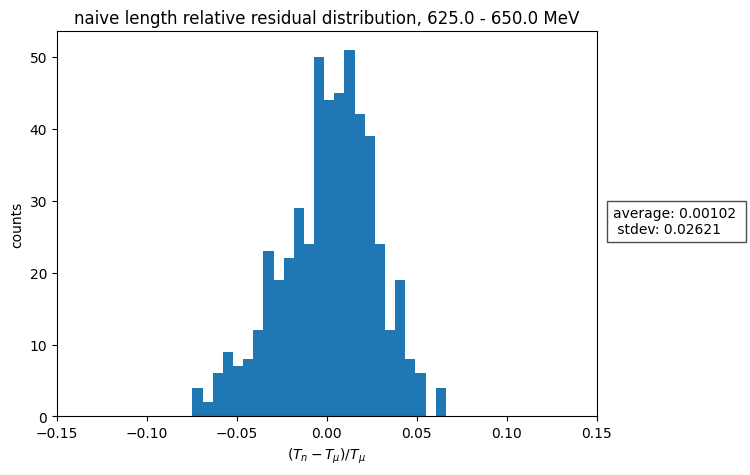

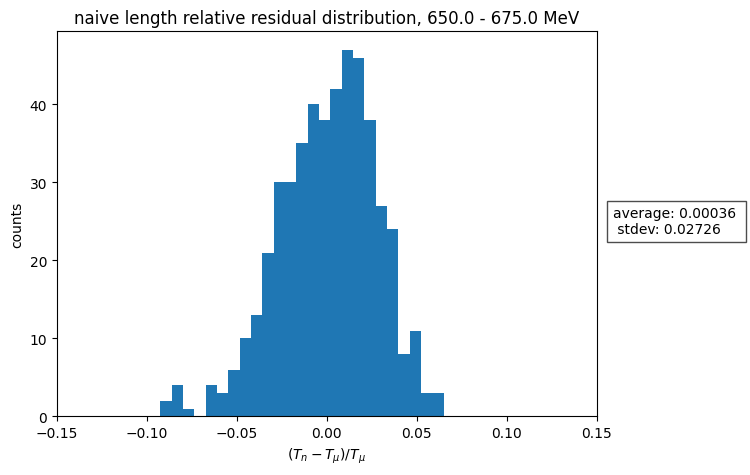

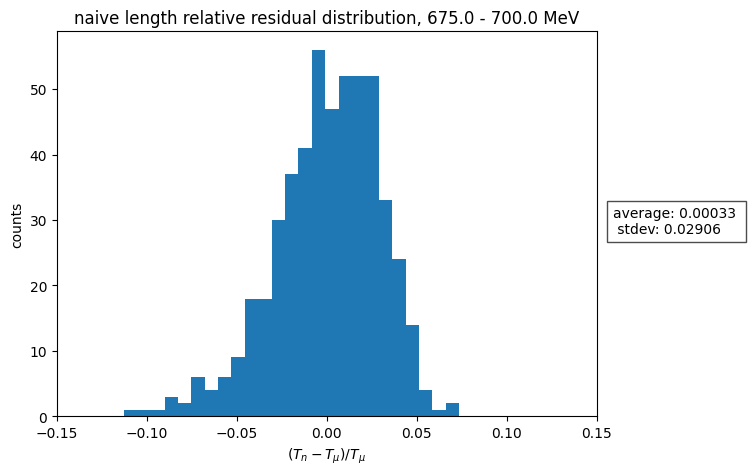

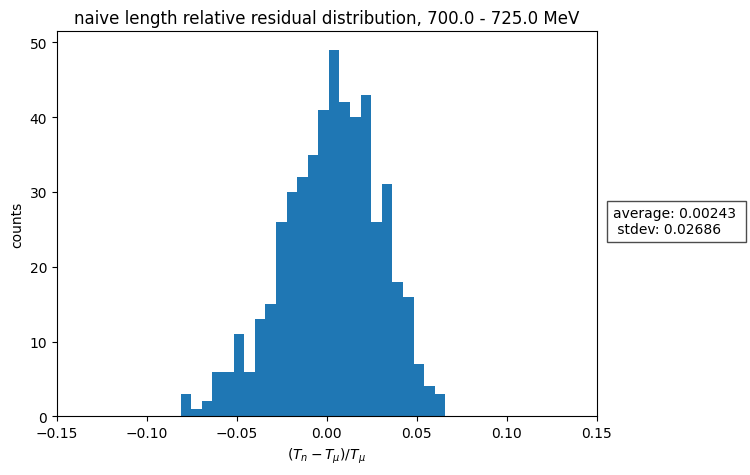

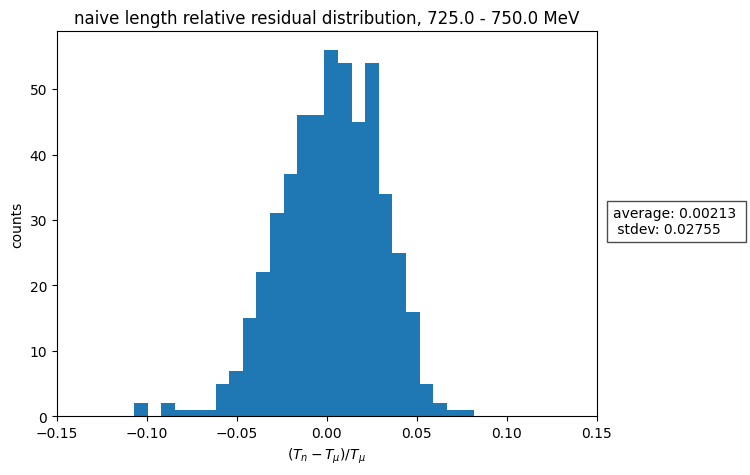

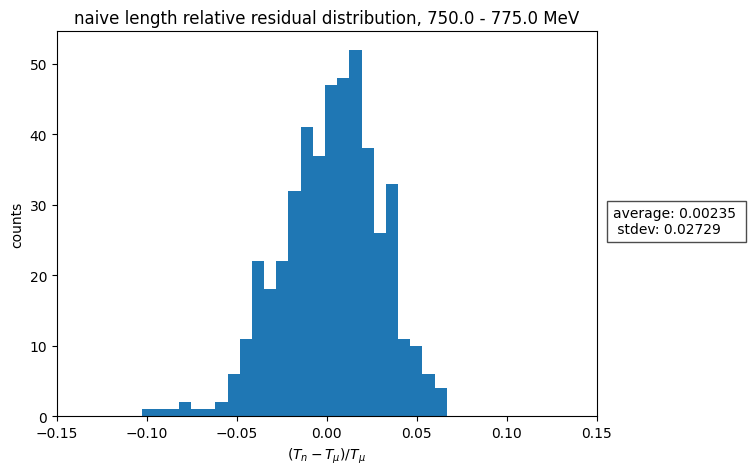

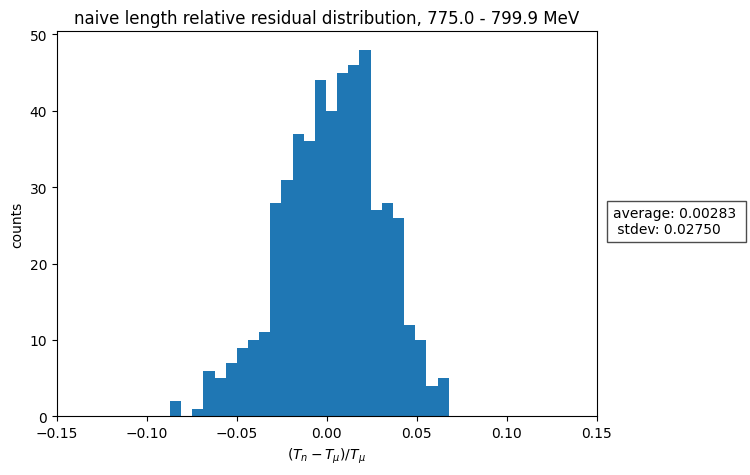

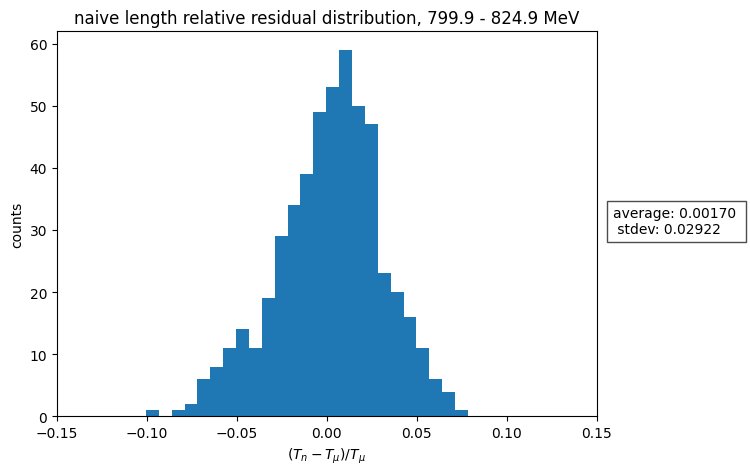

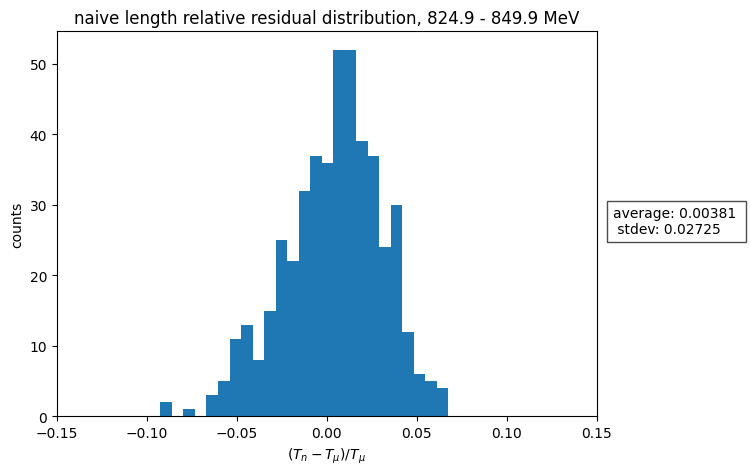

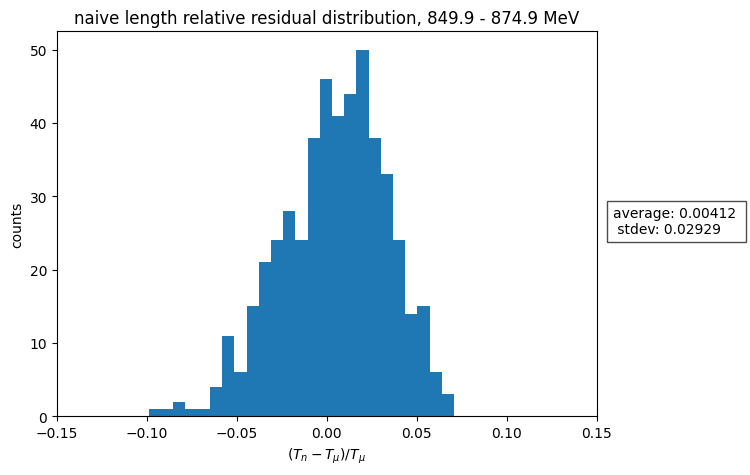

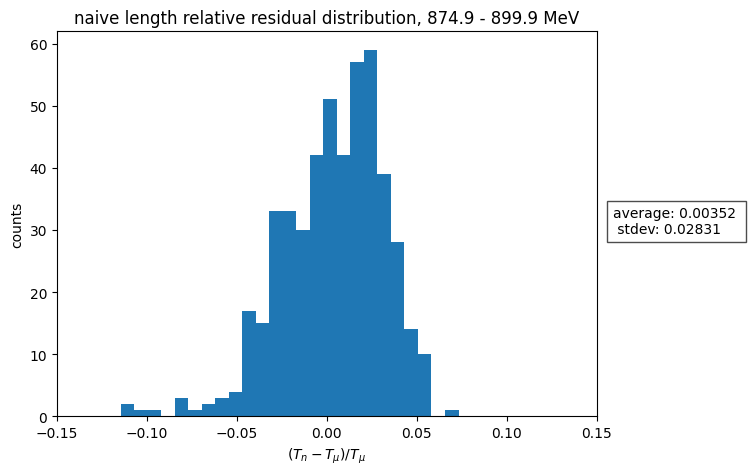

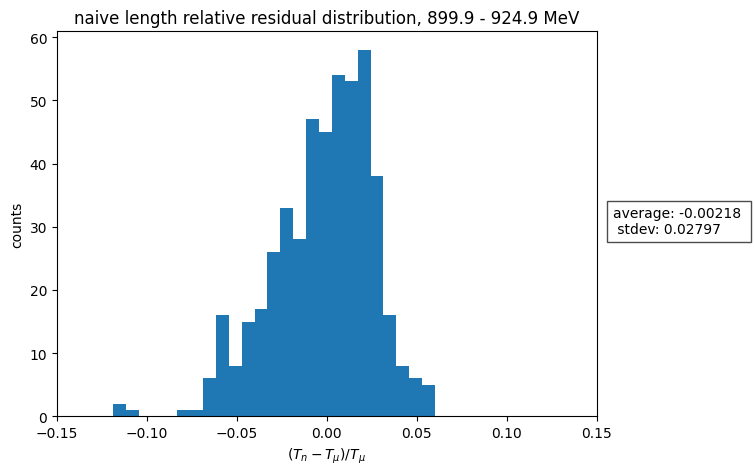

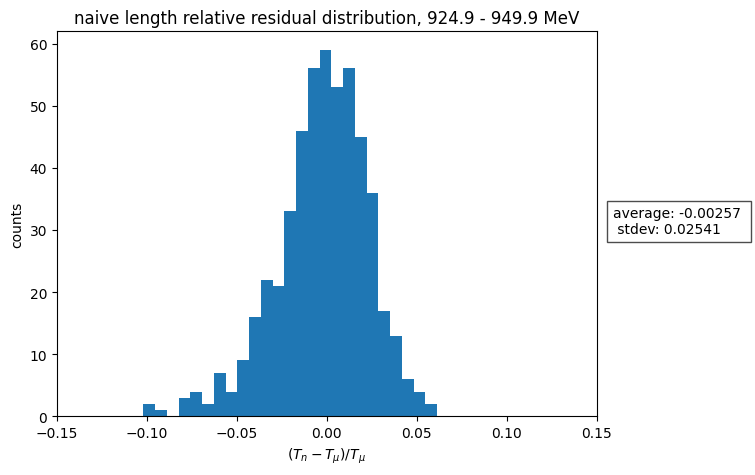

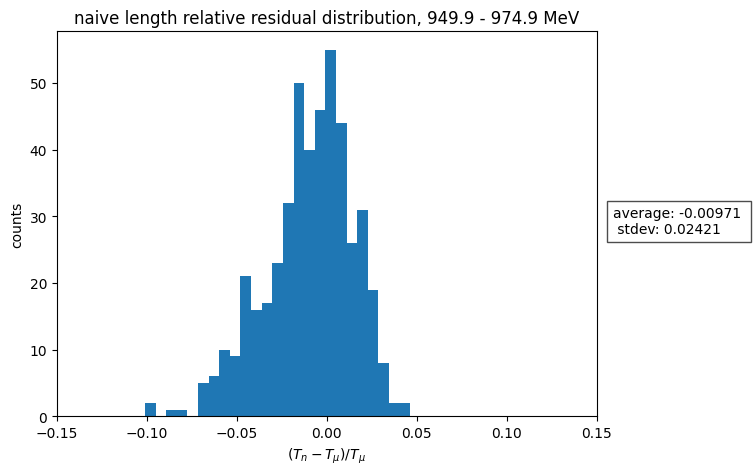

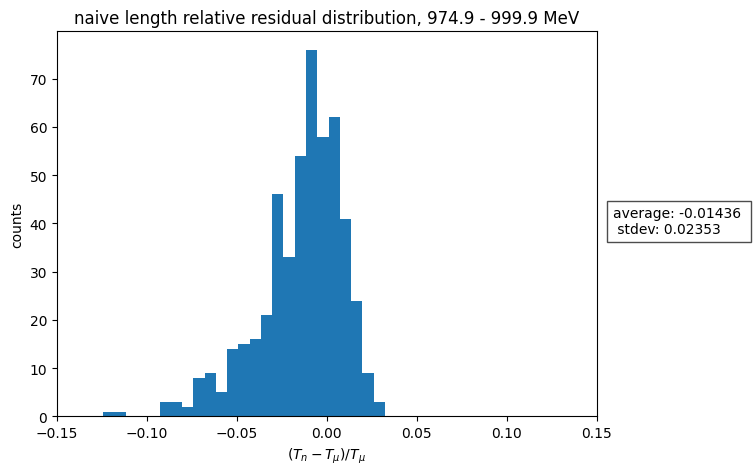

In [25]:
n_bins=40
bins = np.linspace(min(energies), max(energies), n_bins + 1)


bin_labels = range(n_bins)
naive_data_sep = dict.fromkeys(bin_labels, 0)
    
for i, bin_edge in enumerate(bins): 
    if i==0:
        continue
    else:
        mask = (energies >= bins[i-1]) & (energies < bins[i])
        naive_data_sep[i-1] = naive_rres[mask]

naive_stdevs = []
for key in naive_data_sep:
    bin_data = naive_data_sep[key]
    
    min_energy = round(bins[key], 1)
    max_energy = round(bins[key+1], 1)
    
    avg = np.mean(bin_data)
    stdev = np.std(bin_data)
    # naive_stdevs.append(stdev)

    # print('-----')
    # print(min_energy)
    # print(stdev)

    fig, ax = plt.subplots(figsize=(8, 5))
    plt.xlim(-0.15, 0.15)
    ax.hist(naive_data_sep[key], bins=25)
    fig.subplots_adjust(right=0.8)
    plt.title(f'naive length relative residual distribution, {min_energy:.1f} - {max_energy:.1f} MeV')
    plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
    plt.ylabel('counts')
    fig.text(0.82, 0.5, f'average: {avg:.5f} \n stdev: {stdev:.5f}', ha="left", va="center",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="black") )
    # plt.savefig(f'accuracy_plots/naive/bin{key}.png')
    # plt.close()
